

# Demonstração prática: Classificação de flores Iris



*   Para ilustrar o uso prático do Scikit-learn, vamos implementar um modelo de classificação utilizando o famoso conjunto de dados Iris. Este é um dos exemplos mais populares para introdução ao machine learning e está incluído na própria biblioteca Scikit-learn.


---


### O dataset Iris
O conjunto de dados Iris consiste em 150 amostras de flores, sendo 50 de cada uma das três espécies de Iris: Setosa, Versicolour e Virginica. Para cada amostra, foram medidas quatro características: comprimento e largura das sépalas e pétalas, em centímetros. O objetivo é desenvolver um modelo capaz de classificar corretamente a espécie de uma flor com base nestas medições.





### Passo 1: Importar as bibliotecas necessárias

*   Este código importa funções para carregar o dataset, dividir os dados em conjuntos de treino e teste, padronizar as características, implementar o algoritmo KNN (K-Nearest Neighbors) e visualizar os resultados





In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay






### Passo 2: Carregar e explorar os dados

* Os datasets no Scikit-learn são geralmente objetos do tipo Bunch, que funcionam como dicionários que também permitem acesso aos elementos através de atributos. Neste caso, temos acesso aos dados das medições (data), aos rótulos das espécies (target), aos nomes das características (feature_names) e a uma descrição do dataset (DESCR).

In [16]:
# Carregando o dataset
iris_dataset = load_iris()

# Explorando a estrutura do dataset
print("Chaves do dataset iris:", iris_dataset.keys())
print("Descrição do dataset:", iris_dataset['DESCR'][:150] + "...")
print("Nomes das classes:", iris_dataset['target_names'])
print("Nomes das características:", iris_dataset['feature_names'])
print("Formato dos dados:", iris_dataset['data'].shape)
print("Primeiras 5 linhas:", iris_dataset['data'][:5])
print("Rótulos dos alvos:", iris_dataset['target'])


Chaves do dataset iris: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Descrição do dataset: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:N...
Nomes das classes: ['setosa' 'versicolor' 'virginica']
Nomes das características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Formato dos dados: (150, 4)
Primeiras 5 linhas: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Rótulos dos alvos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Passo 3: Dividir os dados em conjuntos de treino e teste

* Uma etapa fundamental em Machine Learning é a divisão dos dados em conjuntos de treino e teste.
Isso permite avaliar o desempenho do modelo em dados que não foram vistos durante o treinamento, proporcionando uma medida mais realista da sua capacidade de generalização.

Utilizaremos a função train_test_split() do sklearn para separar os dados:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


Neste exemplo:

Usamos 80% dos dados para treino e 20% para teste

O parâmetro random_state=42 garante reprodutibilidade dos resultados, ou seja, a mesma divisão será feita sempre que o código for executado.

### Passo 4: Pré-processar os dados

* Muitos algoritmos de Machine Learning têm melhor desempenho quando os dados são padronizados.
Isso significa transformar os dados para que tenham média 0 e variância 1, o que ajuda a estabilizar e acelerar o processo de treinamento.

Para isso, utilizamos o StandardScaler da biblioteca sklearn:

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Passo 5: Treinar o modelo

* Agora que os dados foram padronizados, vamos treinar um modelo de classificação usando o algoritmo K-Nearest Neighbors (KNN).

* O KNN é simples e eficaz: ele classifica uma nova amostra observando os K vizinhos mais próximos no espaço dos dados e atribui a classe mais comum entre eles.

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

* O que significa n_neighbors=5?
Isso quer dizer que o modelo irá considerar os 5 exemplos mais próximos para decidir a classe de uma nova amostra.

* Importante: O KNN não aprende um modelo explícito como outros algoritmos (por exemplo, redes neurais ou regressão logística). Ele guarda os dados de treino e compara distâncias sempre que uma nova previsão é solicitada.

### Passo 6: Avaliar o modelo

* Após o treinamento, é hora de verificar como o modelo se comporta em dados que ele nunca viu — ou seja, o conjunto de teste:
* Acurácia: proporção de acertos entre todas as previsões feitas no teste.
* Quanto mais próxima de 1 (ou 100%), melhor o desempenho do modelo.

In [26]:
score = knn.score(X_test_scaled, y_test)
print(f"Acurácia no conjunto de teste: {score:.2f}")

Acurácia no conjunto de teste: 1.00


### Passo 7: Fazer previsões com o modelo

In [28]:
# Exemplo de novos dados (medidas de sépalas e pétalas)
novo_exemplo = [[5.1, 3.5, 1.4, 0.2]]  # Medidas de uma nova flor

# Padronizar o novo exemplo
novo_exemplo_scaled = scaler.transform(novo_exemplo)

# Fazer a previsão
predicao = knn.predict(novo_exemplo_scaled)
print(f"Previsão: {iris_dataset['target_names'][predicao[0]]}")


Previsão: setosa


### Visualização do modelo
* Para compreender melhor como o algoritmo KNN classifica os dados, podemos visualizar as fronteiras de decisão utilizando apenas duas características do conjunto de dados: comprimento e largura da sépala.

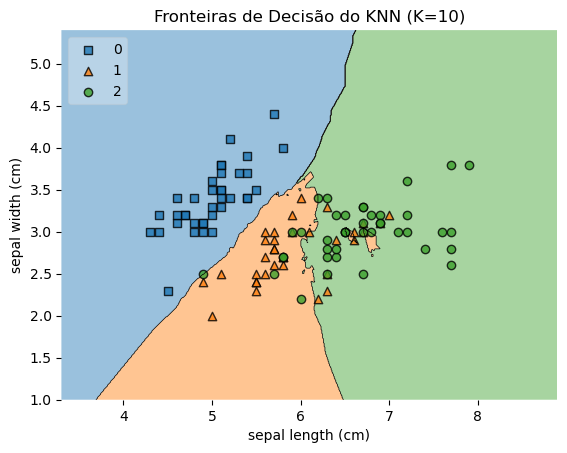

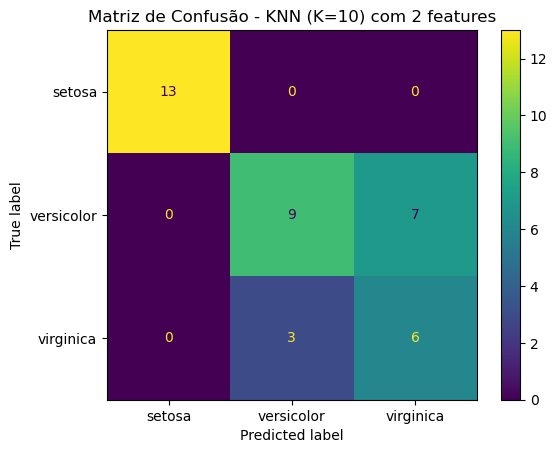

In [52]:
# Carrega o dataset Iris
iris = load_iris()
X = iris.data[:, :2]  # Apenas sepal length e width
y = iris.target

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Altere o valor de K aqui
k = 10
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Plot
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Fronteiras de Decisão do KNN (K={k})')
plt.show()

print("\n")

# Geração da matriz de confusão com dados de teste
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title(f'Matriz de Confusão - KNN (K={k}) com 2 features')
plt.show()

### Exercício

* Modifique o código para utilizar as 4 features (comprimento e largura de pétalas e sépalas)
* Altere o valor de k e observe o comportamento das fronteiras de decisão e da matriz de confusão

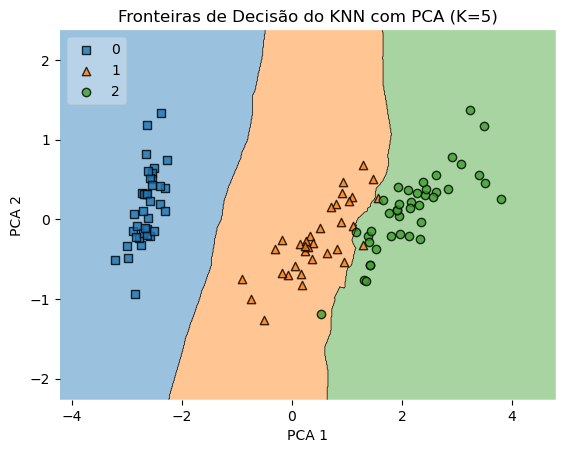

In [53]:
# Carrega o dataset Iris
iris = load_iris()
X = iris.data[:, :4] # <--------------------- Modificar para usar todas as 4 features
y = iris.target

# Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Divisão treino/teste com dados reduzidos
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=0)

# Modelo KNN
k = 5 # <--------------------- Modificar para observar o comportamento
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Plot das fronteiras de decisão
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'Fronteiras de Decisão do KNN com PCA (K={k})')
plt.show()


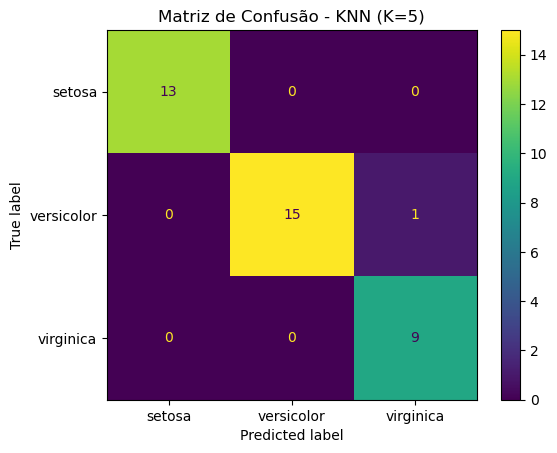

In [56]:
# Carrega o dataset Iris
iris = load_iris()
X = iris.data[:, :4] # <--------------------- Modificar para usar todas as 4 features
y = iris.target

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Treinamento do modelo
k = 5 # <--------------------- Modificar para observar o comportamento
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Geração e exibição da matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title(f'Matriz de Confusão - KNN (K={k})')
plt.show()
